In [2]:
# Connect src to notebooks
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

# Dependencies
from src.utils import get_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = get_data()

In [3]:
data.head()

,date,customer_id,product_id,quantity,unit_price,revenue,marketing_campaign
0,2021-01-01,372,58,4,42.01,168.04,False
1,2021-01-02,288,61,1,74.71,74.71,False
2,2021-01-03,130,24,3,36.74,110.22,False
3,2021-01-04,175,20,3,60.98,182.94,False
4,2021-01-05,462,37,2,52.84,105.68,False


In [4]:
data['product_id'].unique()

array([ 58,  61,  24,  20,  37,   4,  92,  60,  50,  49,  51,  96,  36,
        98, 100,  66,  79,  34,   6,  39,  42,  12,   3,  18,  40,  21,
        15,  97,  99,  26,   8,  94,  87,  44,  14,  78,   2,  69,  38,
        41,  62,  89,  84,  70,  17,  28,  35,   5,  65,  76,  56,  45,
        23,  47,  31,  11,  10,  67,  80,  74,  93,   1,  43,  57,  64,
        73,  29,  59,  33,  53,  88,  95,  52,  85,  86,  55,  90,  30,
        82,  91,  72,  46,  68,  19,  48,  63,  13,  77,  75,  83,  54,
        71,   9,  25])

In [5]:
data.shape

(250, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                250 non-null    object 
 1   customer_id         250 non-null    int64  
 2   product_id          250 non-null    int64  
 3   quantity            250 non-null    int64  
 4   unit_price          250 non-null    float64
 5   revenue             250 non-null    float64
 6   marketing_campaign  250 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 12.1+ KB


In [7]:
data.describe()

,customer_id,product_id,quantity,unit_price,revenue
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,249.824000,49.924000,4.860000,57.880640,280.358120
std,146.369921,29.070304,4.352029,26.864545,309.511866
min,2.000000,1.000000,0.000000,10.570000,0.000000
25%,119.750000,26.000000,2.000000,33.675000,74.810000
50%,259.500000,48.500000,3.000000,61.665000,177.140000
75%,382.000000,74.750000,6.000000,81.440000,329.907500
max,500.000000,100.000000,16.000000,99.810000,1572.960000


In [8]:
data.isna().sum()

date                  0
customer_id           0
product_id            0
quantity              0
unit_price            0
revenue               0
marketing_campaign    0
dtype: int64

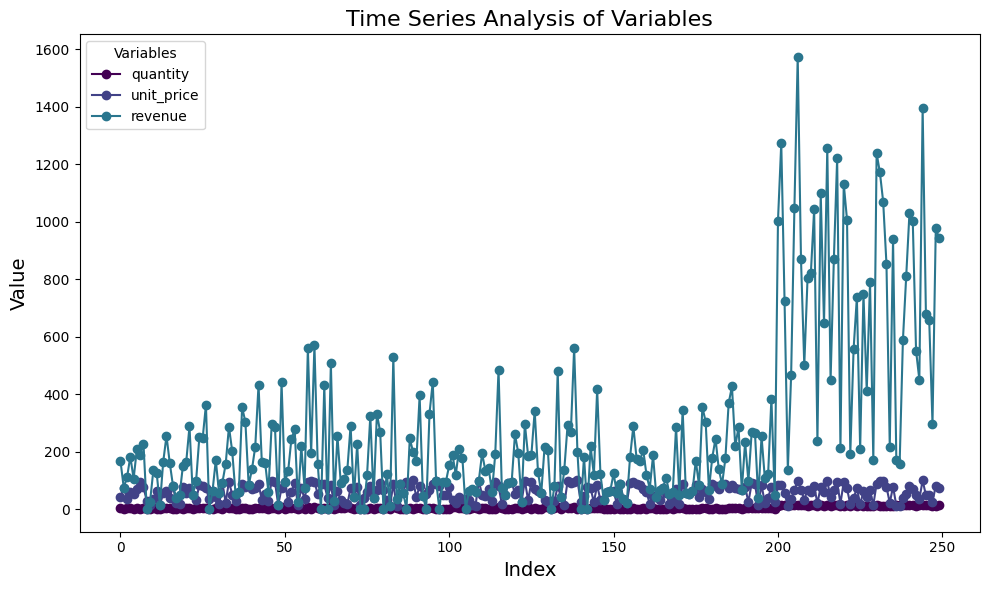

In [9]:
plt.figure(figsize=(10, 6))
vars_to_plot = ['quantity', 'unit_price', 'revenue']
colors = plt.get_cmap('viridis').colors

for i, var in enumerate(vars_to_plot):
    plt.plot(data.index, data[var], marker = 'o', label = var, color = colors[i * 50])

plt.title('Time Series Analysis of Variables', fontsize = 16)
plt.xlabel('Index', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.legend(title = 'Variables')
plt.tight_layout()
plt.show()

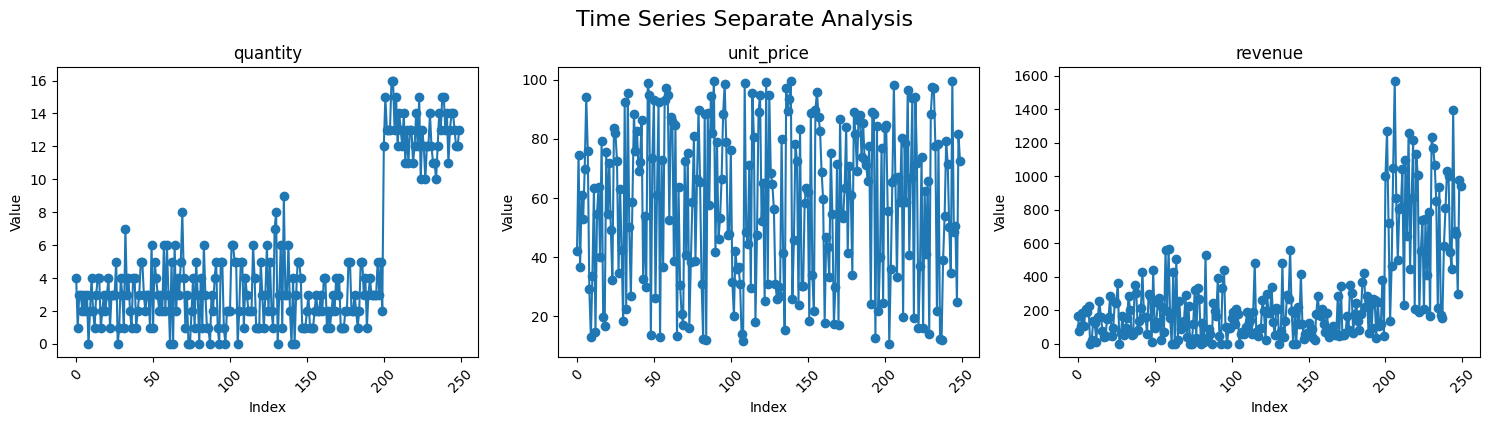

In [10]:
variables_to_plot = ['quantity', 'unit_price', 'revenue']
fig, axes = plt.subplots(nrows=1, ncols=len(variables_to_plot), figsize=(15, 4), sharex=True)

for ax, var in zip(axes, variables_to_plot):
    ax.plot(data.index, data[var], marker = 'o')
    ax.set_title(var)
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.tick_params(axis = 'x', rotation = 45) 

plt.tight_layout()
plt.suptitle('Time Series Separate Analysis', fontsize = 16, y = 1.05)
plt.show()


At index 200, both revenue and quantities shot up. What happened?

In [26]:
data['date'] = pd.to_datetime(data['date'])
weekly_quantity = data.groupby(pd.Grouper(key = 'date', freq = 'W'))['quantity'].sum().reset_index()
weekly_revenue = data.groupby(pd.Grouper(key = 'date', freq = 'W'))['revenue'].sum().reset_index()
weekly_rq = pd.concat([
    weekly_quantity['date'],
    weekly_quantity['quantity'],
    weekly_revenue['revenue']
], axis=1)

weekly_rq.columns = ['week_start', 'quantity', 'revenue']


In [27]:
weekly_rq

,week_start,quantity,revenue
0,2021-01-03,8,352.97
1,2021-01-10,15,939.84
2,2021-01-17,19,934.74
3,2021-01-24,18,837.82
4,2021-01-31,19,1147.41
5,2021-02-07,22,1202.22
6,2021-02-14,23,1498.32
7,2021-02-21,21,1320.47
8,2021-02-28,22,1593.60
9,2021-03-07,22,1692.23


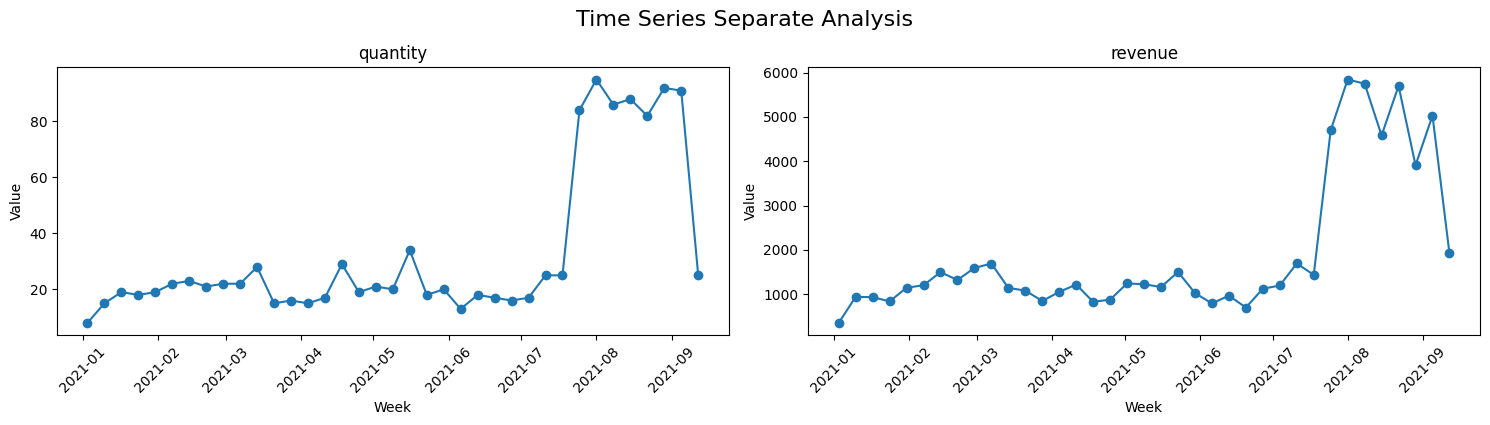

In [ ]:
variables_to_plot = ['quantity', 'revenue']
fig, axes = plt.subplots(nrows = 1, ncols = len(variables_to_plot), figsize = (15, 4), sharex = True)

for ax, var in zip(axes, variables_to_plot):
    ax.plot(weekly_rq['week_start'], weekly_rq[var], marker = 'o')
    ax.set_title(var)
    ax.set_xlabel('Week')
    ax.set_ylabel('Value')
    ax.tick_params(axis = 'x', rotation = 45) 

plt.tight_layout()
plt.suptitle('Time Series Separate Analysis', fontsize = 16, y = 1.05)
plt.show()

Text(0, 0.5, 'quantity')

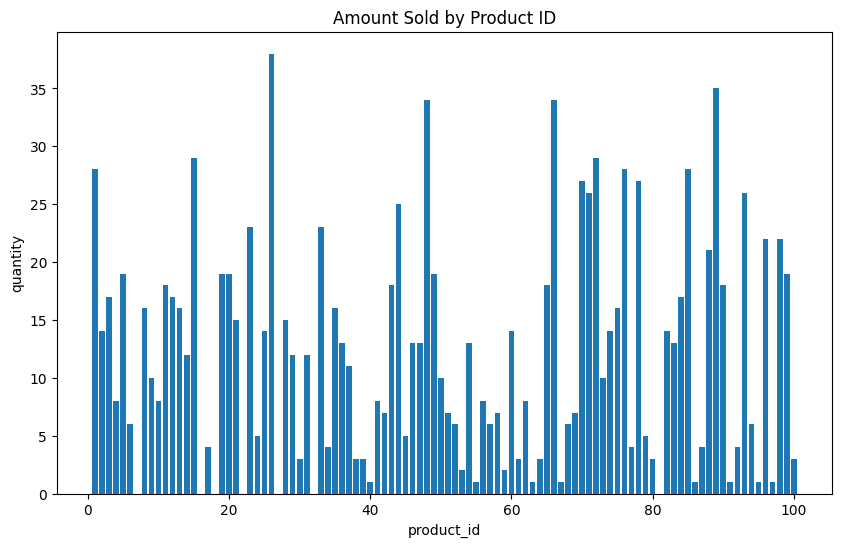

In [41]:
pid_qty = data.groupby('product_id')['quantity'].sum().reset_index()
plt.figure(figsize = (10, 6))
plt.bar(x = pid_qty['product_id'], height = pid_qty['quantity'])
plt.title('Amount Sold by Product ID')
plt.xlabel('product_id')
plt.ylabel('quantity')

In [35]:
np.unique(pid_qty['product_id'])

array([  1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,  14,
        15,  17,  18,  19,  20,  21,  23,  24,  25,  26,  28,  29,  30,
        31,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100])